In [1]:
%cd ../

/Users/jingles/github/torchsignal


In [3]:
from torchsignal.datasets import OPENBMI

s1 = OPENBMI(root="_data/openbmi", subject_id=1, session=1)

print(s1.data.shape)
print(type(s1.data))

(100, 62, 4000)
<class 'numpy.ndarray'>


(62, 4000)
(62, 129, 17)


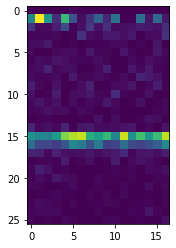

In [26]:
import matplotlib.pyplot as plt
from scipy import signal
import numpy as np

s1_sample = s1.data[0]
print(s1_sample.shape)
f, t, Sxx = signal.spectrogram(s1_sample, fs=1000)
print(Sxx.shape)

plt.imshow(Sxx[0, 0:26])
plt.show()

In [27]:

f, t, Zxx = signal.stft(s1_sample, fs=1000, nperseg=1000)
print(Zxx.shape)

Zxx = Zxx.view(np.float32)

plt.imshow(Zxx[0, 0:26])
plt.show()


(62, 501, 9)


ValueError: To change to a dtype of a different size, the array must be C-contiguous

In [32]:
import torch

# torch.stft

s1_tensor = torch.tensor(s1.data)
s1_tensor.shape

torch.Size([100, 62, 4000])

In [46]:
s1_stft = torch.stft(s1_tensor[0], n_fft=1000, hop_length=None, win_length=None, window=None, center=True, pad_mode='reflect', normalized=False, onesided=True)

s1_stft.shape

torch.Size([62, 501, 17, 2])

In [47]:
s1_stft[:,:,:,0].shape

torch.Size([62, 501, 17])